In [4]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')
suppressMessages(library(dplyr))
suppressMessages(library(verification))


cv=read.csv("covid.csv",header=T)
cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=2)

p = cv %>% filter(RESULTADO == 2) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos
p = cv %>% filter(RESULTADO == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos

cv_covid_negativo = cv %>% filter(RESULTADO == 2)
cv_covid_positivo = cv %>% filter(RESULTADO == 1)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)


In [5]:
str(cv)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION )
cv$FECHA_INGRESO <- as.Date(cv$FECHA_INGRESO)
cv$FECHA_SINTOMAS <- as.Date(cv$FECHA_SINTOMAS)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION)
attach(cv)
str(cv)
summary(cv$RESULTADO)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


Classes 'tbl_df', 'tbl' and 'data.frame':	125054 obs. of  35 variables:
 $ FECHA_ACTUALIZACION: Factor w/ 1 level "2020-05-22": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID_REGISTRO        : Factor w/ 210070 levels "000013","000023",..: 115524 148361 103775 114685 170696 738 112582 30798 46761 64302 ...
 $ ORIGEN             : int  2 1 2 1 2 2 1 2 2 2 ...
 $ SECTOR             : int  9 12 12 12 4 12 99 12 12 4 ...
 $ ENTIDAD_UM         : int  9 15 9 14 9 31 32 28 1 31 ...
 $ SEXO               : int  1 1 1 2 2 1 1 2 1 1 ...
 $ ENTIDAD_NAC        : int  15 15 15 14 15 31 32 28 14 30 ...
 $ ENTIDAD_RES        : int  9 15 15 14 9 31 32 28 1 31 ...
 $ MUNICIPIO_RES      : int  5 5 58 85 7 102 48 22 1 50 ...
 $ TIPO_PACIENTE      : int  1 1 2 1 1 1 2 1 1 1 ...
 $ FECHA_INGRESO      : Factor w/ 143 levels "2020-01-01","2020-01-02",..: 136 132 131 113 133 140 127 108 128 125 ...
 $ FECHA_SINTOMAS     : Factor w/ 143 levels "2020-01-01","2020-01-02",..: 136 126 129 109 133 140 126 101 127 121 ...
 $ FECHA_DE

The following objects are masked from cv (pos = 3):

    ASMA, CARDIOVASCULAR, DIABETES, EDAD, EMBARAZO, ENTIDAD_NAC,
    ENTIDAD_RES, ENTIDAD_UM, EPOC, FECHA_ACTUALIZACION, FECHA_DEF,
    FECHA_INGRESO, FECHA_SINTOMAS, HABLA_LENGUA_INDI,
    HABLA_LENGUA_INDIG, HIPERTENSION, ID_REGISTRO, INMUSUPR, INTUBADO,
    MIGRANTE, MUNICIPIO_RES, NACIONALIDAD, NEUMONIA, OBESIDAD, ORIGEN,
    OTRA_COM, OTRA_CON, OTRO_CASO, PAIS_NACIONALIDAD, PAIS_ORIGEN,
    RENAL_CRONICA, RESULTADO, SECTOR, SEXO, TABAQUISMO, TIPO_PACIENTE,
    UCI




Classes 'tbl_df', 'tbl' and 'data.frame':	125054 obs. of  37 variables:
 $ FECHA_ACTUALIZACION: Date, format: "2020-05-22" "2020-05-22" ...
 $ ID_REGISTRO        : Factor w/ 210070 levels "000013","000023",..: 115524 148361 103775 114685 170696 738 112582 30798 46761 64302 ...
 $ ORIGEN             : Factor w/ 2 levels "1","2": 2 1 2 1 2 2 1 2 2 2 ...
 $ SECTOR             : Factor w/ 13 levels "1","2","3","4",..: 8 11 11 11 4 11 13 11 11 4 ...
 $ ENTIDAD_UM         : Factor w/ 32 levels "1","2","3","4",..: 9 15 9 14 9 31 32 28 1 31 ...
 $ SEXO               : Factor w/ 2 levels "1","2": 1 1 1 2 2 1 1 2 1 1 ...
 $ ENTIDAD_NAC        : Factor w/ 33 levels "1","2","3","4",..: 15 15 15 14 15 31 32 28 14 30 ...
 $ ENTIDAD_RES        : Factor w/ 32 levels "1","2","3","4",..: 9 15 15 14 9 31 32 28 1 31 ...
 $ MUNICIPIO_RES      : Factor w/ 309 levels "1","2","3","4",..: 5 5 58 85 7 102 48 22 1 50 ...
 $ TIPO_PACIENTE      : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 2 1 1 1 ...
 $ FECHA_INGRESO

1     2 
62527 62527

Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = RESULTADO ~ EDAD + ENTIDAD_RES + SEXO + NEUMONIA + 
    DIABETES + ASMA + EPOC + OTRO_CASO + OBESIDAD + HIPERTENSION + 
    CARDIOVASCULAR + INTUBADO, family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3901  -1.0153  -0.3899   1.0752   2.4115  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.6986699  0.1362254  12.470  < 2e-16 ***
EDAD             -0.0149915  0.0006175 -24.278  < 2e-16 ***
ENTIDAD_RES2     -1.7422839  0.0807552 -21.575  < 2e-16 ***
ENTIDAD_RES3     -0.6391918  0.1094077  -5.842 5.15e-09 ***
ENTIDAD_RES4     -0.9096971  0.1291632  -7.043 1.88e-12 ***
ENTIDAD_RES5      0.3331143  0.0884795   3.765 0.000167 ***
ENTIDAD_RES6     -0.4055776  0.1921394  -2.111 0.034785 *  
ENTIDAD_RES7     -1.3255913  0.1003031 -13.216  < 2e-16 ***
ENTIDAD_RES8     -0.9846204  0.0953341 -10.328  < 2e-16 ***
ENTIDAD_RES9     -1.1662151  0.0685040 -17.024  < 2e-16 ***
ENTIDA

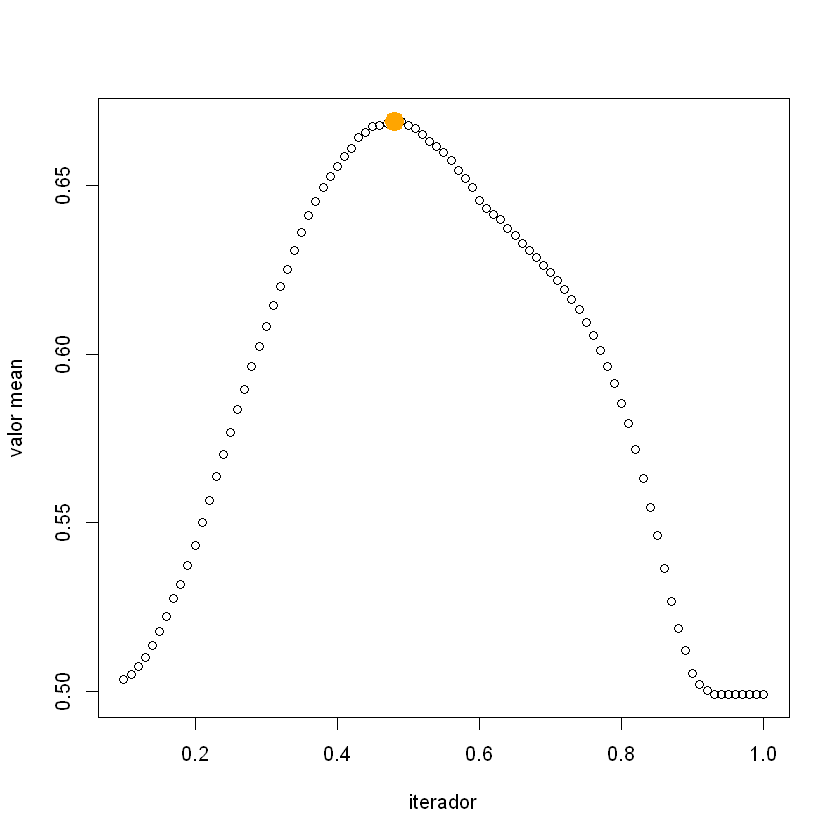

In [6]:
########################### LOGISTICA
##########################
glm1<- glm(RESULTADO~ EDAD+ENTIDAD_RES+SEXO+NEUMONIA+DIABETES+ASMA+EPOC+OTRO_CASO+OBESIDAD+HIPERTENSION+CARDIOVASCULAR+INTUBADO,family=binomial ,data = Train)
summary(glm1)
yhat2<- predict(glm1, newdata=Test,type="response")
#para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
#se repite 91 veces 
size=1
val_mean <- rep(0,91)
for(i in seq(0.1,1,by=0.01)){
  y=as.integer(yhat2>i)
  y=ifelse(y =="0",1,2)
  val_mean[size]=mean(y == Test$RESULTADO)
  size=size+1
}
size=2
lugar=1
mejor=val_mean[lugar]
for(i in seq(0.11,1,by=0.01)){
  if(val_mean[size]>mejor){
    mejor=val_mean[size]
    b=i
    lugar=size
  }
  size=size+1
}
y=seq(0.1,1,by=0.01)
plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
points(b, val_mean[lugar],  col = "orange", lwd = 10)


[1] 0.48

[1] 0.6691349

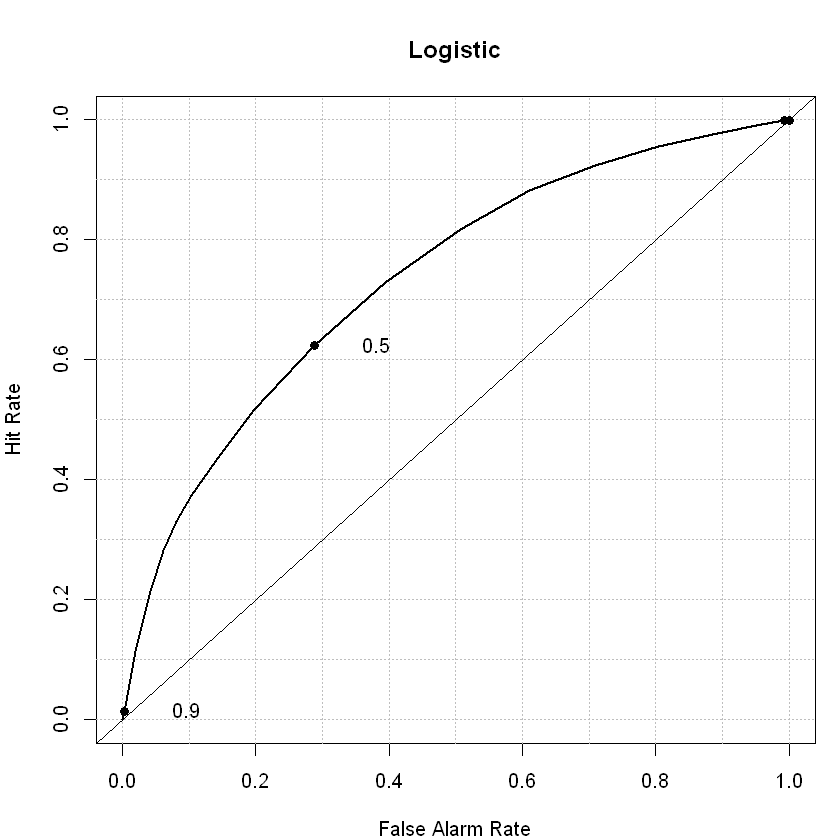

In [7]:
b
val_mean[lugar]
####rocplot

roc= ifelse(Test$RESULTADO==1,0,1)
roc.plot(x = roc, pred =yhat2,
         threshold = seq(0, max(yhat2), 0.05),
         plot.thres = c(0.03, 0.05, 0.1, 0.5, 0.9), main="Logistic")




[1] 0.6689189

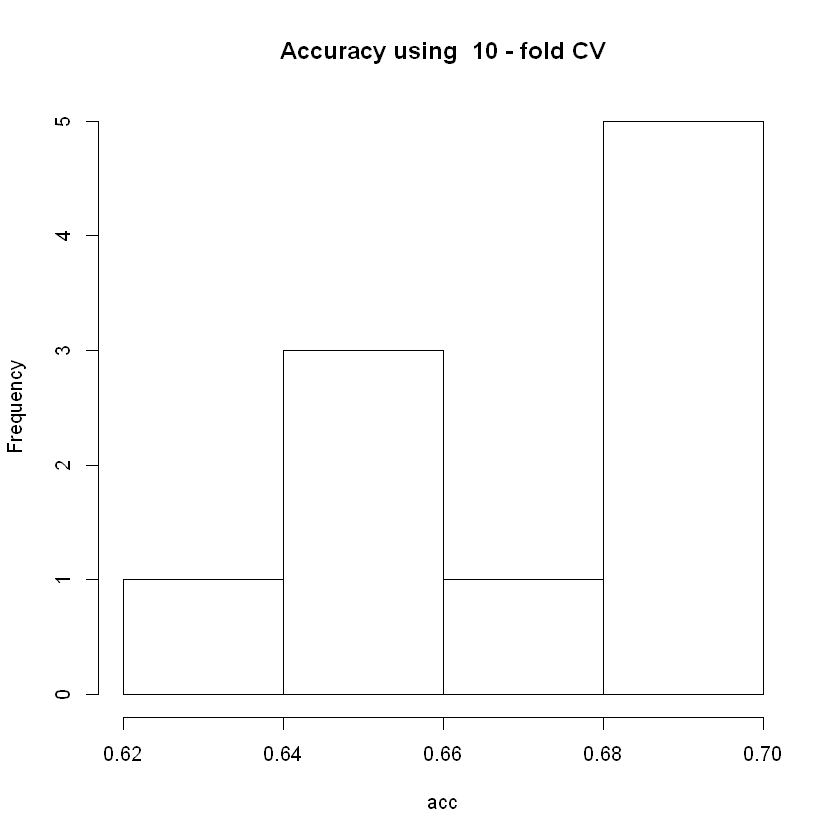

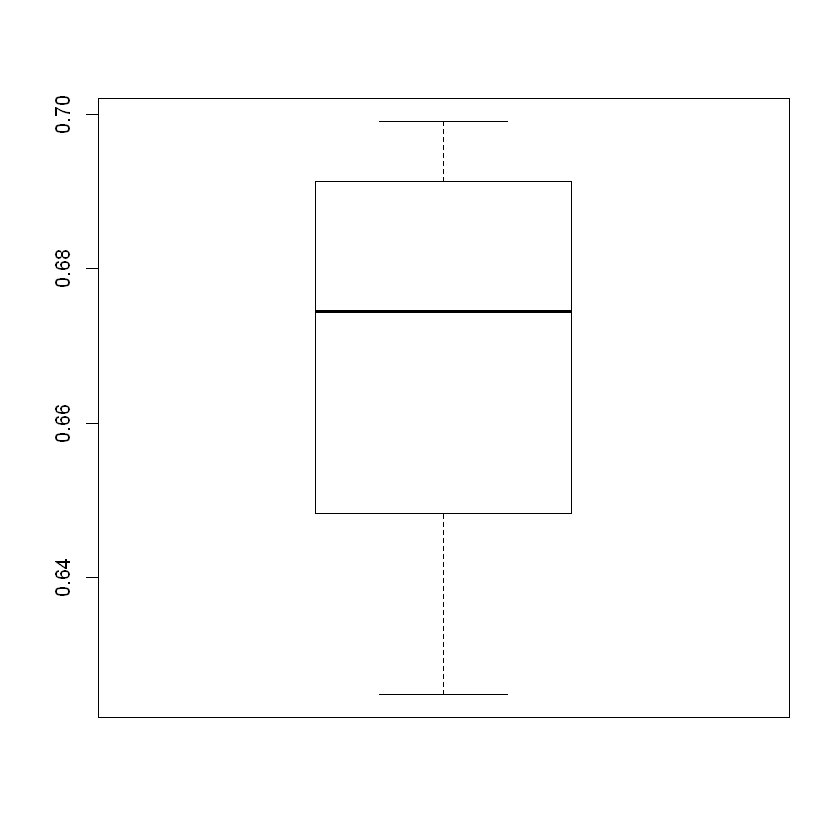

In [8]:
#################### k-folds



n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <-glm(RESULTADO~ EDAD+ENTIDAD_RES+SEXO+NEUMONIA+DIABETES+ASMA+EPOC+OTRO_CASO+OBESIDAD+HIPERTENSION+CARDIOVASCULAR+INTUBADO,family="binomial" ,data = train)
  
  y = test$RESULTADO
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >0.47,2,1) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc)


In [9]:
########################## LDA
##########################LDA#####
lda1 <- lda(RESULTADO~ EDAD+ENTIDAD_RES+SEXO+NEUMONIA+DIABETES+ASMA+EPOC+OTRO_CASO+OBESIDAD+HIPERTENSION+CARDIOVASCULAR+INTUBADO,family=binomial ,data = Train)
lda1
yhat1 <- predict(lda1, Test)$class
yhat1

table(yhat1,Test$RESULTADO)
mean(yhat1 == Test$RESULTADO)
yy=predict(lda1, Test)
roc.plot(x = as.numeric(Test$RESULTADO), pred =yy$posterior[,2],
         threshold = seq(0, max(as.numeric(yy$posterior[,2])), 0.05),
         plot.thres = c(0.03, 0.05, 0.1, 0.5, 0.9),main="LDA")

Call:
lda(RESULTADO ~ EDAD + ENTIDAD_RES + SEXO + NEUMONIA + DIABETES + 
    ASMA + EPOC + OTRO_CASO + OBESIDAD + HIPERTENSION + CARDIOVASCULAR + 
    INTUBADO, data = Train, family = binomial)

Prior probabilities of groups:
        1         2 
0.5009196 0.4990804 

Group means:
      EDAD ENTIDAD_RES2 ENTIDAD_RES3 ENTIDAD_RES4 ENTIDAD_RES5 ENTIDAD_RES6
1 46.41601   0.06363143  0.007918010  0.006130072   0.01254749  0.001915648
2 40.32330   0.02175864  0.009966032  0.005255400   0.04294046  0.002467474
  ENTIDAD_RES7 ENTIDAD_RES8 ENTIDAD_RES9 ENTIDAD_RES10 ENTIDAD_RES11
1  0.015389036   0.01842214    0.2841544   0.003128891    0.01516554
2  0.009805807   0.01265782    0.2041915   0.011632378    0.07360764
  ENTIDAD_RES12 ENTIDAD_RES13 ENTIDAD_RES14 ENTIDAD_RES15 ENTIDAD_RES16
1    0.01596373    0.01720890    0.01759203     0.1621596    0.02008237
2    0.01278600    0.01057489    0.07527399     0.1092098    0.02784721
  ENTIDAD_RES17 ENTIDAD_RES18 ENTIDAD_RES19 ENTIDAD_RES20 ENTIDAD_R

[1] 2 2 1 1 2 1 2 2 2 1 2 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 2 2 1 1 2 1 1 2 2 1
   [37] 2 1 2 2 2 2 2 1 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 1 1 2 1
   [73] 2 2 1 1 2 2 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2
  [109] 1 1 2 2 1 1 2 1 2 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1 2 1 2 2 1 1 1 1 2 2 2 1
  [145] 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1
  [181] 2 1 2 1 2 2 1 2 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 2 1 2 1 1 1 1 2 1 2 1 1 1
  [217] 2 1 2 2 2 2 1 1 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 1 1 2 1
  [253] 1 2 1 1 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 1 1 2 1 1 2 1 2 2 2 1 2 1 1 2
  [289] 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 1 2 2 2
  [325] 2 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 1 2 2 1 2
  [361] 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2
  [397] 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 2 1
  [433] 2 1 2 1 2 2 2 1 2 2 2 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2
  [469] 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 1 1 2 2 1 1
  [505] 2 1 1 2 1 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 1 1 2 1
  [541] 2 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 1 1
  [577] 1 1 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 1 2 2 1 2 1 2 2 2 2 2 1 2 2 1 1 1 2 1
  [613] 2 1 1 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 1 2 2 2 1 2 1 2 2 2 1 1 2 1 2 2 1 1
  [649] 1 2 1 1 2 2 1 2 2 2 1 1 1 1 2 1 1 1 1 2 2 2 1 2 2 1 2 1 2 2 2 1 2 2 2 2
  [685] 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 1 2 1 2 2 2 1 1 2 1 2 2 2 2 2 1 2 2 2 2
  [721] 2 1 1 2 1 2 1 1 1 2 1 2 2 1 1 2 2 1 2 2 1 2 1 2 2 1 2 2 2 1 2 2 2 1 2 1
  [757] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2
  [793] 2 2 1 2 1 1 2 1 2 1 2 1 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1 2 1 1
  [829] 2 2 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 2 2 2 2
  [865] 2 2 2 2 2 2 1 2 2 1 2 1 2 1 1 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
  [901] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2
  [937] 2 2 2 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2 2 2 1 2 2 2 2 1 1 1 2 1 2
  [973] 2 2 2 1 1 1 1 1 2 2 1 2 2 1 2 1 2 1 2 2 2 1 1 2 2 1 1 1 2 2 1 1 2 2 1 1
 [1009] 1 1 2 2 2 2 2 1 1 1 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 1 1
 [1045] 2 2 1 1 1 2 2 1 2 2 1 1 2 1 2 1 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1 2 2 2 1 2
 [1081] 2 1 1 1 1 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 1
 [1117] 2 1 2 1 2 2 1 2 1 2 2 1 2 2 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 2 2 2 2 2 2 1
 [1153] 1 2 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 2
 [1189] 1 2 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1 1 1 2 2 1 2 1
 [1225] 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 [1261] 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 1 1 2 2 2 1 1 2 2 1
 [1297] 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 2 1 2 1 2 2 2 2 1 2 2 1 2 1 2 1 1 2 2 1 2
 [1333] 2 2 1 2 2 1 1 2 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 2 1 2 2 1 2 1 2 1 1 1 1 1
 [1369] 2 2 2 2 1 2 1 2 2 1 1 2 2 1 1 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 1 2 1
 [1405] 2 2 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 1
 [1441] 2 1 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2
 [1477] 2 2 2 1 2 2 1 2 1 2 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 2
 [1513] 1 2 2 2 1 2 1 2 2 2 2 2 2 1 2 1 2 1 1 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 1
 [1549] 2 2 2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 2
 [1585] 1 1 1 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2
 [1621] 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 1 1 1 2 2 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1
 [1657] 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2
 [1693] 1 2 2 2 2 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 [1729] 2 2 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 1 1
 [1765] 2 1 1 1 1 1 2 1 1 2 1 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1 2 2 1 1 2 1 2 2 1
 [18

     
yhat1     1     2
    1 22548 12181
    2  8658 19140

[1] 0.66672

ERROR: Error in wilcox.test.default(pred[obs == 1], pred[obs == 0], alternative = "great"): not enough 'y' observations


[1] 0.6681993

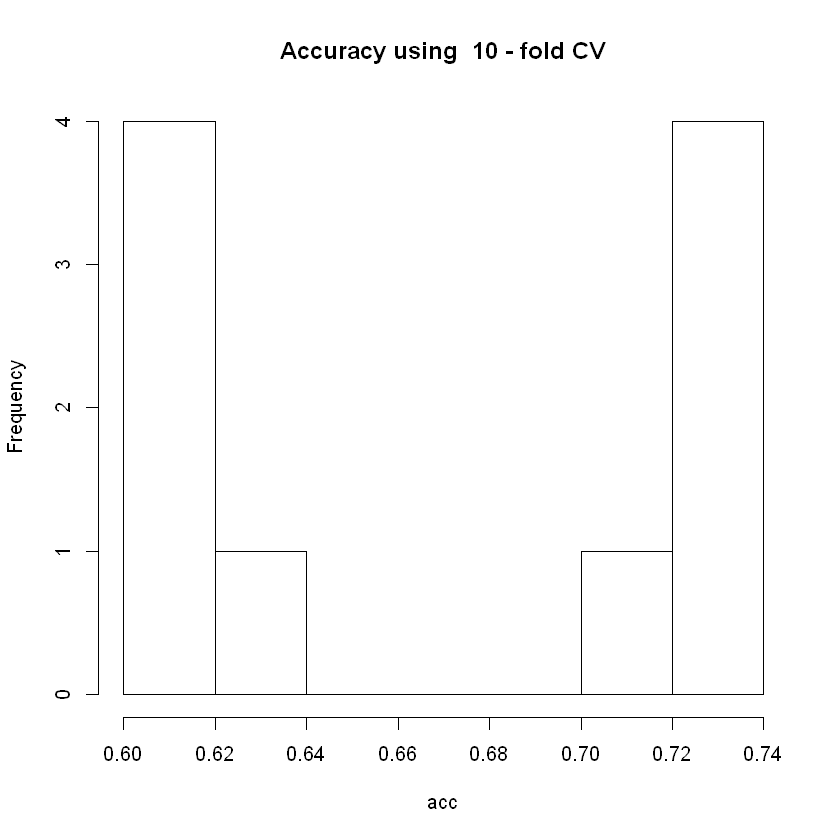

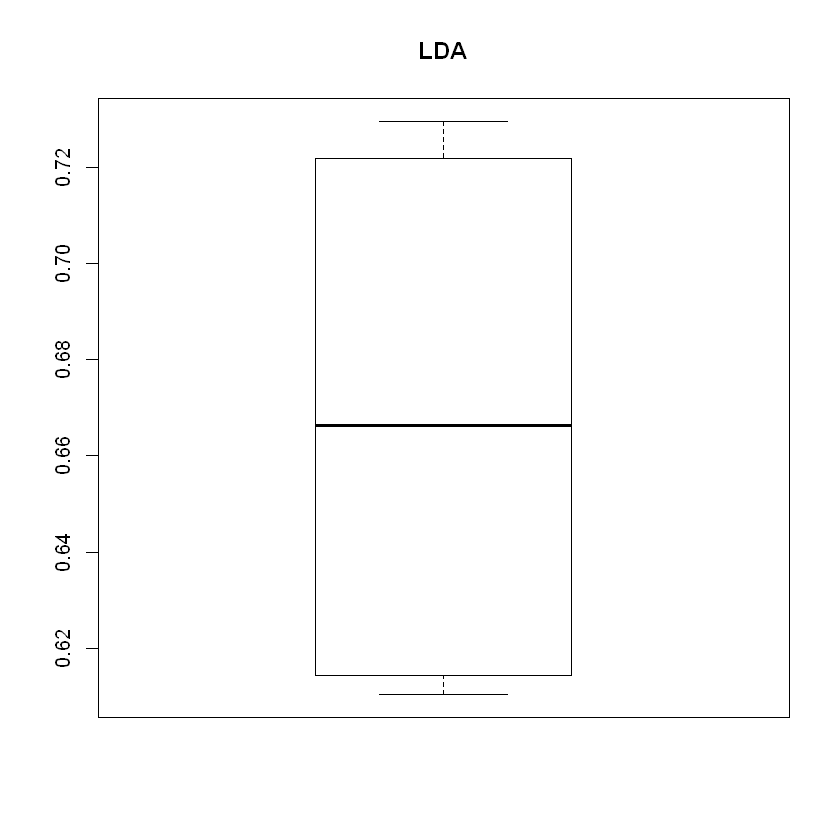

In [11]:
######kfolds
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(RESULTADO~ EDAD+ENTIDAD_RES+SEXO+NEUMONIA+DIABETES+ASMA+EPOC+OTRO_CASO+OBESIDAD+HIPERTENSION+CARDIOVASCULAR+INTUBADO,family=binomial ,data = train)
  
  y = test$RESULTADO
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")

#############KNN#####

